<a href="https://colab.research.google.com/github/aniketxp/rollup-fee-prediction/blob/main/Linear_Regression_to_estimate_rollup_costs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Absolute Error: 0.00 Gwei
R² Score: 1.0000

Predicted Rollup Costs (Gwei):
Batch Size 100, Gas Price 50 Gwei → Estimated Cost: 24.00 Gwei
Batch Size 200, Gas Price 100 Gwei → Estimated Cost: 33.00 Gwei
Batch Size 300, Gas Price 150 Gwei → Estimated Cost: 42.00 Gwei


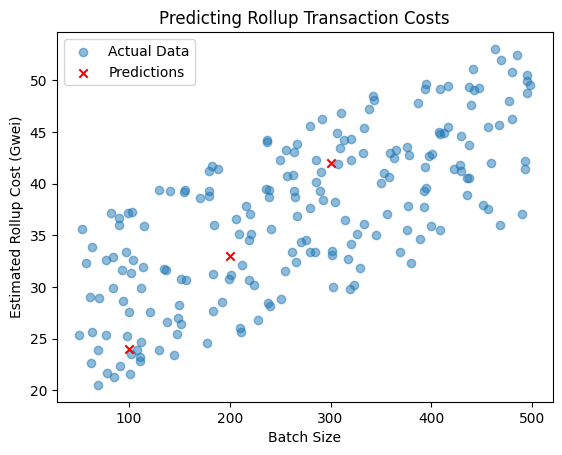

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Simulated rollup transaction data
np.random.seed(42)
batch_size = np.random.randint(50, 500, 200)  # Number of transactions in a rollup batch
eth_gas_price = np.random.uniform(20, 200, 200)  # Ethereum L1 gas price in Gwei

# Simulated Rollup Fee Calculation (hypothetical formula)
# Rollup Cost = Base Cost + (Batch Size * Per-Tx Cost) + (Mainnet Gas Price * Scaling Factor)
rollup_cost = 15 + (batch_size * 0.04) + (eth_gas_price * 0.1)

# Creating DataFrame
df = pd.DataFrame({"batch_size": batch_size, "eth_gas_price": eth_gas_price, "rollup_cost": rollup_cost})

# Defining independent (X) and dependent (y) variables
X = df[["batch_size", "eth_gas_price"]]
y = df["rollup_cost"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting costs on test data
predictions = model.predict(X_test)

# Evaluating model
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae:.2f} Gwei")
print(f"R² Score: {r2:.4f}")

# Predicting costs for new batch sizes & gas prices
new_data = pd.DataFrame({"batch_size": [100, 200, 300], "eth_gas_price": [50, 100, 150]})
new_predictions = model.predict(new_data)

# Print predictions
print("\nPredicted Rollup Costs (Gwei):")
for i, cost in enumerate(new_predictions):
    print(f"Batch Size {new_data.batch_size[i]}, Gas Price {new_data.eth_gas_price[i]} Gwei → Estimated Cost: {cost:.2f} Gwei")

# Visualization
plt.scatter(df["batch_size"], df["rollup_cost"], label="Actual Data", alpha=0.5)
plt.scatter(new_data["batch_size"], new_predictions, color="red", marker="x", label="Predictions")
plt.xlabel("Batch Size")
plt.ylabel("Estimated Rollup Cost (Gwei)")
plt.legend()
plt.title("Predicting Rollup Transaction Costs")
plt.show()
